In [1]:
# import numpy as np
# import pandas as pd

# import keras as ks
# import tensorflow as tn
# from scipy import stats
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_style("darkgrid")

%matplotlib inline

In [2]:
(train_data, train_labels), (test_data, test_labels) = ks.datasets.reuters.load_data(num_words=10000) 

In [3]:
print(train_data.shape, test_data.shape)

(8982,) (2246,)


https://keras.io/datasets/

num_words: integer or None. Top most frequent words to consider. Any less frequent word will appear as oov_char value in the sequence data.

In [4]:
lengths = list()
max_indices = list()
for el in train_data[0:5]:
    lengths.append(len(el))
    max_indices.append(max(el))

print("Train data 0: {}".format(train_data[0]))
print("Type: {}".format(type(train_data[0])))
print("Maximum length: {}".format(max(lengths)))
print("Average length: {}".format(np.mean(lengths)))
print("Largest index: {}".format(max(max_indices)))

Train data 0: [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
Type: <class 'list'>
Maximum length: 224
Average length: 121.4
Largest index: 9691


In [5]:
word_index = ks.datasets.reuters.get_word_index()
#print(word_index)
#max(print([len(i) for i in word_index]))
#np.max(train_data)

In [6]:
reverse_word_index = dict([(value, key) for (key,value) in word_index.items()])

In [7]:
def print_decoded(wire):
    decoded_wire = " ".join([reverse_word_index.get(i-3, "?") for i in wire])
    print(decoded_wire)
print_decoded(train_data[0])
print_decoded(train_data[5])
#decoded_wire = " ".join([reverse_word_index.get(i-3, "?") for i in ])
#decoded_wire

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
? the u s agriculture department estimated canada's 1986 87 wheat crop at 31 85 mln tonnes vs 31 85 mln tonnes last month it estimated 1985 86 output at 24 25 mln tonnes vs 24 25 mln last month canadian 1986 87 coarse grain production is projected at 27 62 mln tonnes vs 27 62 mln tonnes last month production in 1985 86 is estimated at 24 95 mln tonnes vs 24 95 mln last month canadian wheat exports in 1986 87 are forecast at 19 00 mln tonnes vs 18 00 mln tonnes last month exports in 1985 86 are estimated at 17 71 mln tonnes vs 17 72 mln last month reuter 3


In [8]:
def vectorize_sequence(sequences, dimension=10000):
    
    results = np.zeros((len(sequences),dimension))
    # Loop over each row (which is a list of word indices)
    
    for i,sequence in enumerate(sequences):
        # So 'sequence' is a single list of indices
        # The next line assigns 1 to any index which exists in sequence, for this row
        results[i, sequence] = 1
    return results

In [9]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [10]:
print(x_train[0])
print(type(x_train))
print("Train data shape: ",x_train.shape)
print("Test data shape: ", x_test.shape)
print("Density of one example one-hot word vector:",np.mean(x_train[0]))

[ 0.  1.  1. ...,  0.  0.  0.]
<class 'numpy.ndarray'>
Train data shape:  (8982, 10000)
Test data shape:  (2246, 10000)
Density of one example one-hot word vector: 0.0057


In [11]:
print(x_train[0])

[ 0.  1.  1. ...,  0.  0.  0.]


In [12]:
print(train_labels)
print(type(train_labels))
print(max(train_labels))

[ 3  4  3 ..., 25  3 25]
<class 'numpy.ndarray'>
45


In [13]:
def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

In [14]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [15]:
print("", one_hot_train_labels)
print("", one_hot_test_labels)
print("", one_hot_test_labels[0])
print("", one_hot_test_labels)


 [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
 [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [16]:
# We can use a pre-defined function for this in keras! 
one_hot_train_labels = ks.utils.to_categorical(train_labels)
one_hot_test_labels = ks.utils.to_categorical(test_labels)

In [17]:
model = ks.models.Sequential()
model.add(ks.layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(ks.layers.Dense(10, activation="relu"))
model.add(ks.layers.Dense(10, activation="relu"))
model.add(ks.layers.Dense(10, activation="relu"))
model.add(ks.layers.Dense(46, activation="softmax"))

In [18]:
model = ks.models.Sequential()
model.add(ks.layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(ks.layers.Dense(4, activation="relu"))
model.add(ks.layers.Dense(46, activation="softmax"))

In [29]:
model.compile(
    optimizer = ks.optimizers.RMSprop(lr=0.001),
    loss= 'mean_squared_error',
    metrics=["accuracy"],
    )

In [30]:
print(model)
for i in dir(model):
    #print(i)
    pass

In [31]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [32]:
print("Validation data set")
print("x_val", len(x_val))
print("partial_y_train", len(partial_y_train))

print("Training data set")

print("partial_x_train", len(x_val))
print("partial_y_train", len(x_val))

Validation data set
x_val 1000
partial_y_train 7982
Training data set
partial_x_train 1000
partial_y_train 1000


In [33]:
history = model.fit(
    partial_x_train,partial_y_train,
    epochs = 20,
    batch_size = 512,
    validation_data = (x_val,y_val)
)

Train on 7982 samples, validate on 1000 samples
Epoch 1/40
7982/7982 [==============================] - 1s 152us/step - loss: 0.0028 - acc: 0.9099 - val_loss: 0.0091 - val_acc: 0.7130
Epoch 2/40
7982/7982 [==============================] - 1s 128us/step - loss: 0.0027 - acc: 0.9146 - val_loss: 0.0092 - val_acc: 0.7100
Epoch 3/40
7982/7982 [==============================] - 1s 129us/step - loss: 0.0025 - acc: 0.9204 - val_loss: 0.0092 - val_acc: 0.7160
Epoch 4/40
7982/7982 [==============================] - 1s 136us/step - loss: 0.0025 - acc: 0.9230 - val_loss: 0.0092 - val_acc: 0.7100
Epoch 5/40
7982/7982 [==============================] - 1s 129us/step - loss: 0.0024 - acc: 0.9241 - val_loss: 0.0093 - val_acc: 0.7130
Epoch 6/40
7982/7982 [==============================] - 1s 130us/step - loss: 0.0023 - acc: 0.9278 - val_loss: 0.0093 - val_acc: 0.7090
Epoch 7/40
7982/7982 [==============================] - 1s 130us/step - loss: 0.0023 - acc: 0.9270 - val_loss: 0.0093 - val_acc: 0.7080


In [34]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

In [35]:
for k in history_dict:
    print(k)

val_loss
val_acc
loss
acc


In [36]:
def plot_hist(history_dict):
    fig = plt.figure(figsize=(5,4))
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5),sharey=False)
    
    ax1.plot(epochs,  history_dict['loss'],label="Train")
    ax1.plot(epochs,  history_dict['val_loss'],label="CV")
    ax1.set_title("Loss function development - Training set vs CV set")
    ax1.legend(loc='upper right')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Values')
    
    ax2.plot(epochs,  history_dict['acc'],label="Train")
    ax2.plot(epochs,  history_dict['val_acc'],label="CV")
    ax2.set_title("Accuracy development - Training set vs CV set")
    ax2.legend(loc='upper right')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Values')
    
    plt.suptitle('TITLE', fontsize=16)

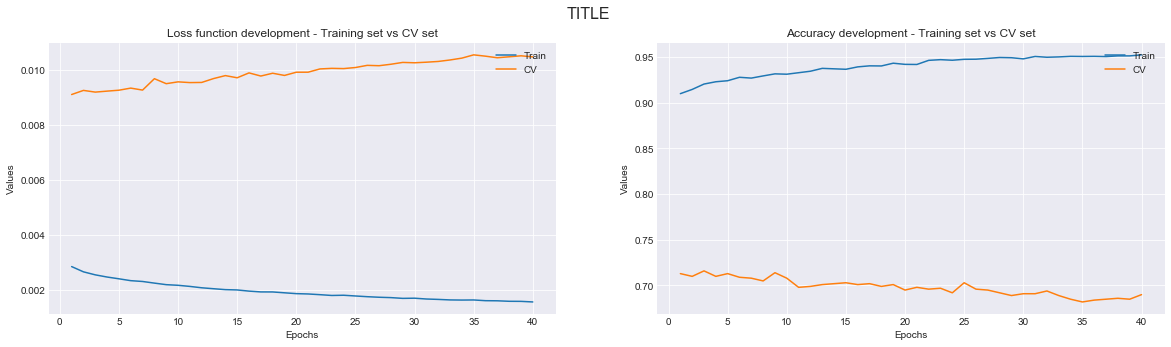

In [37]:
plot_hist(history_dict)

In [38]:
result = model.evaluate(x_test,one_hot_test_labels)
print(result)

2246/2246 [==============================] - 0s 166us/step
[0.011120360127367404, 0.6674087266251113]
